<a href="https://colab.research.google.com/github/priyanshgupta1998/DataScience_codes/blob/master/Time_series_forcast_Rail_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Time Series Forecasting

In [0]:
import pandas as pd          
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 
import warnings                   # To ignore the warnings warnings.filterwarnings("ignore")
import seaborn as sns

Now let’s read the train and test data

In [0]:
test=pd.read_csv("/home/Test_Rail.csv") 
train=pd.read_csv("/home/Train_Rail.csv")

Let’s make a copy of train and test data so that even if we do changes in these dataset we do not lose the original dataset.

In [0]:
train_original=train.copy() 
test_original=test.copy()

In [6]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [7]:
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


 let’s have a quick look at the dataset

In [8]:
train.columns

Index(['ID', 'Datetime', 'Count'], dtype='object')

In [9]:
 test.columns

Index(['ID', 'Datetime'], dtype='object')

Let’s look at the data types of each feature.



In [10]:
train.dtypes, test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

ID and Count are in integer format while the Datetime is in object format for the train file.

In test data .
Id is in integer and Datetime is in object format for test file.

Now we will see the shape of the dataset.

In [11]:
train.shape, test.shape

((18288, 3), (5112, 2))

Now we will extract more features to validate our hypothesis.

In [12]:
train.Datetime[:5]

0    25-08-2012 00:00
1    25-08-2012 01:00
2    25-08-2012 02:00
3    25-08-2012 03:00
4    25-08-2012 04:00
Name: Datetime, dtype: object

#Feature Extraction

We will extract the time and date from the Datetime. We have seen earlier that the data type of Datetime is object. So first of all we have to change the data type to datetime format otherwise we can not extract features from it.

In [13]:
train.head(3)

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6


In [0]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')

In [15]:
train.head(3)

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6


In [16]:
train.dtypes   # Data type has been changed

ID                   int64
Datetime    datetime64[ns]
Count                int64
dtype: object

In [17]:
test.dtypes   # Data type has been changed

ID                   int64
Datetime    datetime64[ns]
dtype: object

We made some hypothesis for the effect of hour, day, month and year on the passenger count. So, let’s extract the year, month, day and hour from the Datetime to validate our hypothesis

In [0]:
for i in (train, test, test_original, train_original):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour 

In [19]:
train.head()

,ID,Datetime,Count,year,month,day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


We made a hypothesis for the traffic pattern on weekday and weekend as well. So, let’s make a weekend variable to visualize the impact of weekend on traffic.

We will first extract the day of week from Datetime and then based on the values we will assign whether the day is a weekend or not.

Values of 5 and 6 represents that the days are weekend.

In [0]:
train['day of week'] = train['Datetime'].dt.dayofweek 
temp = train['Datetime']

In [21]:
train.head(3)

,ID,Datetime,Count,year,month,day,Hour,day of week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5


In [22]:
print(train['day of week'][:5])

0    5
1    5
2    5
3    5
4    5
Name: day of week, dtype: int64


In [0]:
def applyer(var_week):
    if var_week.dayofweek == 5 or var_week.dayofweek == 6:
        return 1
    else:
        return 0 
temp2 = train['Datetime'].apply(applyer)  # apply() method is used for seires time format.
train['weekend']=temp2   # one more column is added in the training dataset

In [24]:
train.head()

,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


Let’s look at the time series.

In [25]:
train.index = train['Datetime'] # indexing the Datetime to get the time period on the x-axis. 
train.index     # This is looking like a variable but it is something else.

DatetimeIndex(['2012-08-25 00:00:00', '2012-08-25 01:00:00',
               '2012-08-25 02:00:00', '2012-08-25 03:00:00',
               '2012-08-25 04:00:00', '2012-08-25 05:00:00',
               '2012-08-25 06:00:00', '2012-08-25 07:00:00',
               '2012-08-25 08:00:00', '2012-08-25 09:00:00',
               ...
               '2014-09-25 14:00:00', '2014-09-25 15:00:00',
               '2014-09-25 16:00:00', '2014-09-25 17:00:00',
               '2014-09-25 18:00:00', '2014-09-25 19:00:00',
               '2014-09-25 20:00:00', '2014-09-25 21:00:00',
               '2014-09-25 22:00:00', '2014-09-25 23:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=18288, freq=None)

In [26]:
train.head()  # after completion of indexing the Datetime , we have time period on the x-axis.

,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [27]:
df=train.drop('ID',1)           # drop ID variable to get only the Datetime on x-axis. 
df.head()  # ID has been removed 

,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


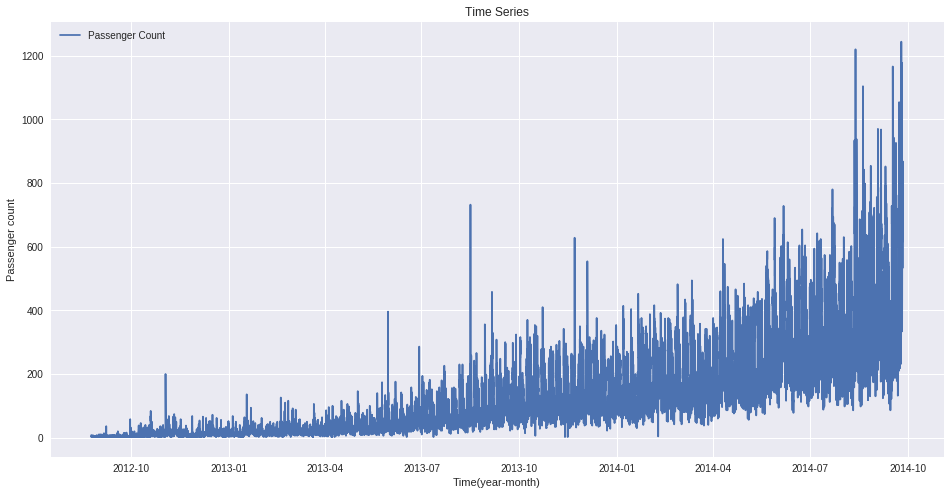

In [28]:
ts = df['Count'] 
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='Passenger Count') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
plt.legend(loc='best')   # To give the label in the graph (right-top side)

Here we can infer that there is an increasing trend in the series, i.e., the number of count is increasing with respect to time. We can also see that at certain points there is a sudden increase in the number of counts. The possible reason behind this could be that on particular day, due to some event the traffic was high.

We will work on the train file for all the analysis and will use the test file for forecasting.

Lets recall the hypothesis that we made earlier:


```

Traffic will increase as the years pass by
Traffic will be high from May to October
Traffic on weekdays will be more
Traffic during the peak hours will be high
```


After having a look at the dataset, we will now try to validate our hypothesis and make other inferences from the dataset.

#Exploratory Analysis

Let's' try to verify our hypothesis using the actual data.  (training data)

Our first hypothesis was traffic will increase as the years pass by.

So let’s look at yearly passenger count.

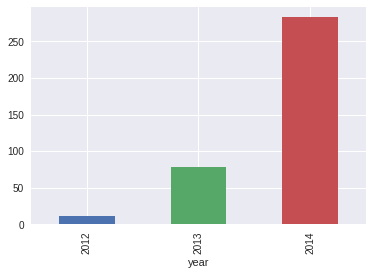

In [29]:
train.groupby('year')['Count'].mean().plot.bar()

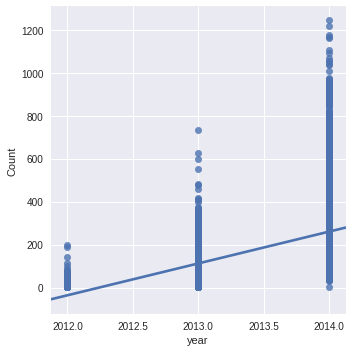

In [30]:
sns.lmplot(data=train, x ='year',y='Count')   #By linear regression we can see that No. of passengers is increasing per year. But this is not good method.

We have seen an exponential growth in the traffic with respect to year which validates our hypothesis.

Our second hypothesis was about increase in traffic from May to October. So, let’s see the relation between count and month.

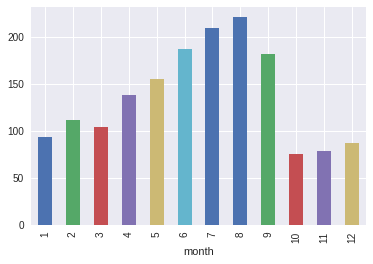

In [31]:
train.groupby('month')['Count'].mean().plot.bar()   # according to month ,we will check How many passengers are travelling per month.

In [32]:
len(train['month']) , train['month'].shape

(18288, (18288,))

In [33]:
m=np.unique(train['month'])
print(len(m))
print(m)

12
[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [34]:
y=np.unique(train['year'])
print(len(y))
print(y)

3
[2012 2013 2014]


Here we see a decrease in the mean of passenger count in last three months (In monthly graph ).  This does not look right. Let’s look at the monthly mean of each year separately.

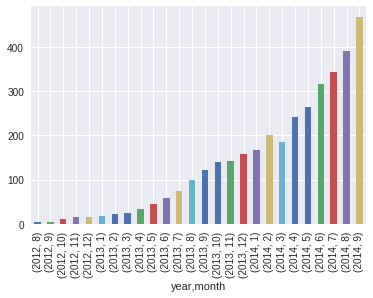

In [35]:
temp=train.groupby(['year', 'month'])['Count'].mean() 
temp.plot.bar()

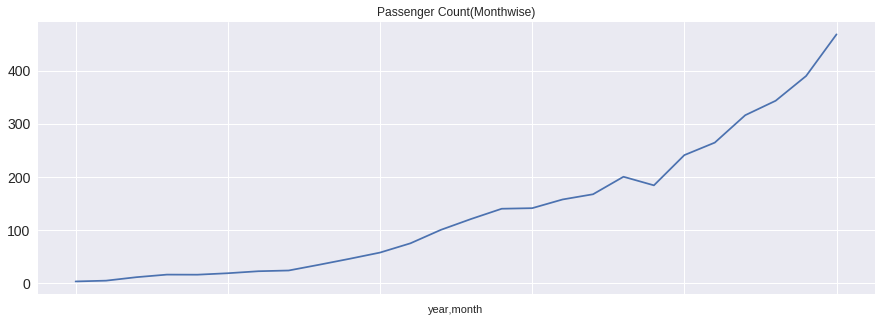

In [36]:
temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)

~~We see that the months 10, 11 and 12 are not present for the year 2014 and the mean value for these months in year 2012 is very less.

~~Since there is an increasing trend in our time series, the mean value for rest of the months will be more because of their larger passenger counts in year 2014 and we will get smaller value for these 3 months.


~~In the above line plot we can see an increasing trend in monthly passenger count and the growth is approximately exponential.

Let’s look at the daily mean of passenger count.

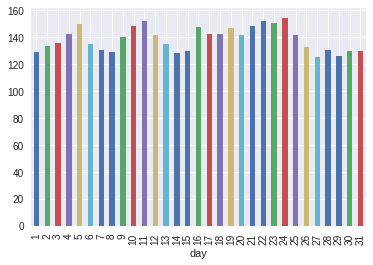

In [37]:
train.groupby('day')['Count'].mean().plot.bar()

We are not getting much insights from day wise count of the passengers.

We also made a hypothesis that the traffic will be more during peak hours. So let’s see the mean of hourly passenger count.

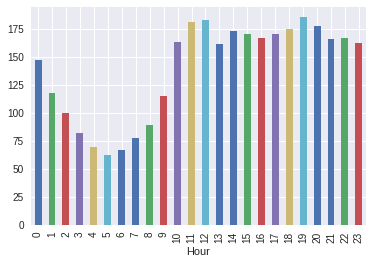

In [38]:
train.groupby('Hour')['Count'].mean().plot.bar()

It can be inferred that the peak traffic is at 7 PM (19) and then we see a decreasing trend till 5 AM.

After that the passenger count starts increasing again and peaks again between 11AM and 12 Noon.

Let’s try to validate our hypothesis in which we assumed that the traffic will be more on weekdays.

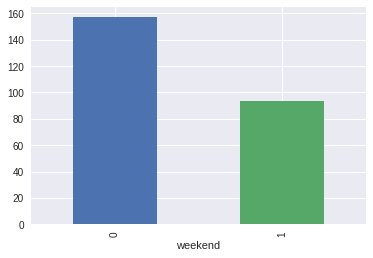

In [39]:
train.groupby('weekend')['Count'].mean().plot.bar()   # Here 0 represents the weekdays and 1 represents the 'weekends'

It can be inferred from the above plot that the traffic is more on weekdays as compared to weekends which validates our hypothesis.

Now we will try to look at the day wise passenger count. (corresponding to week days)

Note - 0 is the starting of the week, i.e., 0 is Monday and 6 is Sunday.

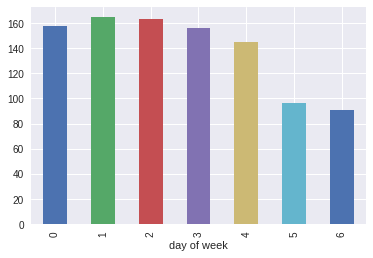

In [40]:
train.groupby('day of week')['Count'].mean().plot.bar()

It can be clearly seen , From the above bar plot, we can infer that the passenger count is less for saturday and sunday as compared to the other days of the week. 

Now ,we will drop the ID variable as it has nothing to do with the passenger count.

In [0]:
train=train.drop('ID',1)

In [42]:
train.head(3)   # ID has been removed

,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1


As we have seen that there is a lot of noise in the hourly time series, we will aggregate the hourly time series to daily, weekly, and monthly time series to reduce the noise and make it more stable 

hence it would be easier for a model to learn.

In [43]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.Timestamp[:5]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


Datetime
2012-08-25 00:00:00   2012-08-25 00:00:00
2012-08-25 01:00:00   2012-08-25 01:00:00
2012-08-25 02:00:00   2012-08-25 02:00:00
2012-08-25 03:00:00   2012-08-25 03:00:00
2012-08-25 04:00:00   2012-08-25 04:00:00
Name: Datetime, dtype: datetime64[ns]

In [44]:
train.index = train.Timestamp 
train.index[:5]

DatetimeIndex(['2012-08-25 00:00:00', '2012-08-25 01:00:00',
               '2012-08-25 02:00:00', '2012-08-25 03:00:00',
               '2012-08-25 04:00:00'],
              dtype='datetime64[ns]', name='Datetime', freq=None)

In [45]:
# Hourly time series 
hourly = train.resample('H').mean() 
hourly.head(3)

,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,
2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,6,2012,8,25,2,5,1


In [46]:
train.head(3)

,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1


In [47]:
# Converting to daily mean 
daily = train.resample('D').mean() 
daily.head()

,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0


In [48]:
# Converting to weekly mean 
weekly = train.resample('W').mean() 
weekly.head()

,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,
2012-08-26,3.416667,2012.0,8.000000,25.500000,11.5,5.5,1.000000
2012-09-02,3.345238,2012.0,8.285714,21.142857,11.5,3.0,0.285714
2012-09-09,3.654762,2012.0,9.000000,6.000000,11.5,3.0,0.285714
2012-09-16,3.119048,2012.0,9.000000,13.000000,11.5,3.0,0.285714
2012-09-23,4.714286,2012.0,9.000000,20.000000,11.5,3.0,0.285714


In [49]:
# Converting to monthly mean 
monthly = train.resample('M').mean()
monthly.head()

,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,
2012-08-31,2.952381,2012.0,8.0,28.0,11.5,3.000000,0.285714
2012-09-30,4.444444,2012.0,9.0,15.5,11.5,3.166667,0.333333
2012-10-31,10.986559,2012.0,10.0,16.0,11.5,2.806452,0.258065
2012-11-30,15.827778,2012.0,11.0,15.5,11.5,3.033333,0.266667
2012-12-31,15.680108,2012.0,12.0,16.0,11.5,3.064516,0.322581


Let’s look at the hourly, daily, weekly and monthly time series.

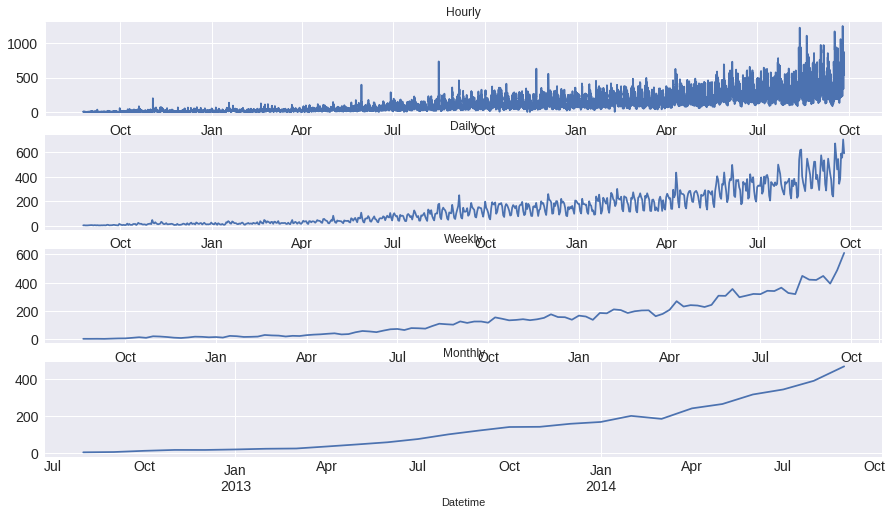

In [50]:
fig, axs = plt.subplots(4,1) 
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0]) 
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1]) 
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2]) 
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3]) 

We can see that the time series is becoming more and more stable when we are aggregating it on daily, weekly and monthly basis.

But it would be difficult to convert the monthly and weekly predictions to hourly predictions, as first we have to convert the monthly predictions to weekly, weekly to daily and daily to hourly predictions, which will become very expanded process. So, we will work on the daily time series.

In [51]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp  

# Converting to daily mean 
test = test.resample('D').mean() 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


![alt text](https://cdn-images-1.medium.com/max/1600/1*ZiYvylk60EY2XG7ck1lqJA.png)

We have two datasets 


1.   Training set   to train the model based on features/characteristics
2.   Testing set  is used to predict the output/throughput as a target value.

Now we can devide this training set (further) into two sets . In which training set has one set of 'validation data' .that is used to give an estimate of model skill while tuning model's hyperparameters





```
As we have validated all our hypothesis, let’s go ahead and build models for Time Series Forecasting. But before we do that, we will need a dataset(validation) to check the performance and generalisation ability of our model. Below are some of the properties of the dataset required for the purpose.

1. The dataset should have the true values of the dependent variable against which the predictions can be checked. Therefore, test dataset cannot be used for the purpose.

2. The model should not be trained on the validation dataset. Hence, we cannot train the model on the train dataset and validate on it as well.

So, for the above two reasons, we generally divide the train dataset into two parts. One part is used to train the model and the other part is used as the validation dataset. Now there are multiple ways to divide the train dataset such as Random Division etc. 
```



For this course, We will be using a time based split explained below.

**1) Splitting the data into training and validation part**

---


```
Now we will divide our data in train and validation. We will make a model on the train part and predict on the validation part to check the accuracy of our predictions.
```
---


To divide the data into training and validation set, we will take last 3 months as the validation data and rest for training data. We will take only 3 months as the trend will be the most in them. If we take more than 3 months for the validation set, our training set will have less data points as the total duration is of 25 months. So, it will be a good choice to take 3 months for validation set.

The starting date of the dataset is 25-08-2012 as we have seen in the exploration part and the end date is 25-09-2014.

# train & valid data

In [52]:
Train=train.ix['2012-08-25':'2014-06-24']    # 20 months as a training set 
valid=train.ix['2014-06-25':'2014-09-25'] #last three months as a validation set  to check the performance of the model

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


We have done time based validation here by selecting the last 3 months for the validation data and rest in the train data. If we would have done it randomly it may work well for the train dataset but will not work effectively on validation dataset.

Lets understand it in this way: If we choose the split randomly it will take some values from the starting and some from the last years as well. It is similar to predicting the old values (previous years) based on the future values( future years) which is not the case in** real scenario**. 

So, this kind of split is used while working with time related problems.

Now we will look at how the train and validation part has been divided.

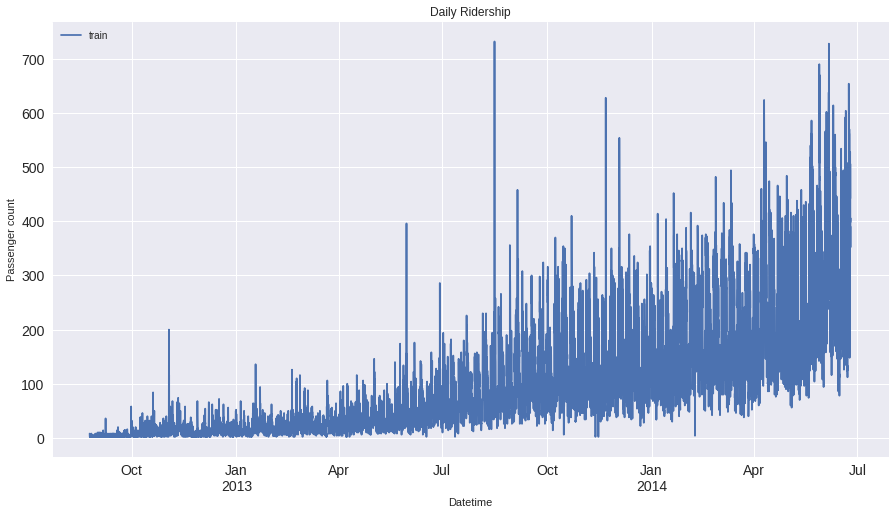

In [53]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train') 
plt.xlabel("Datetime")
plt.ylabel("Passenger count")
plt.legend(loc='best')

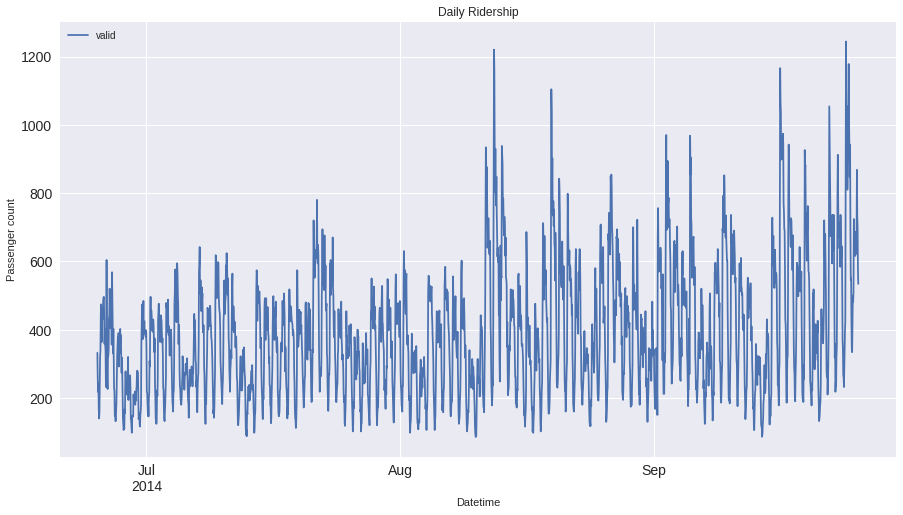

In [54]:
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid') 
plt.xlabel("Datetime")
plt.ylabel("Passenger count")
plt.legend(loc='best')

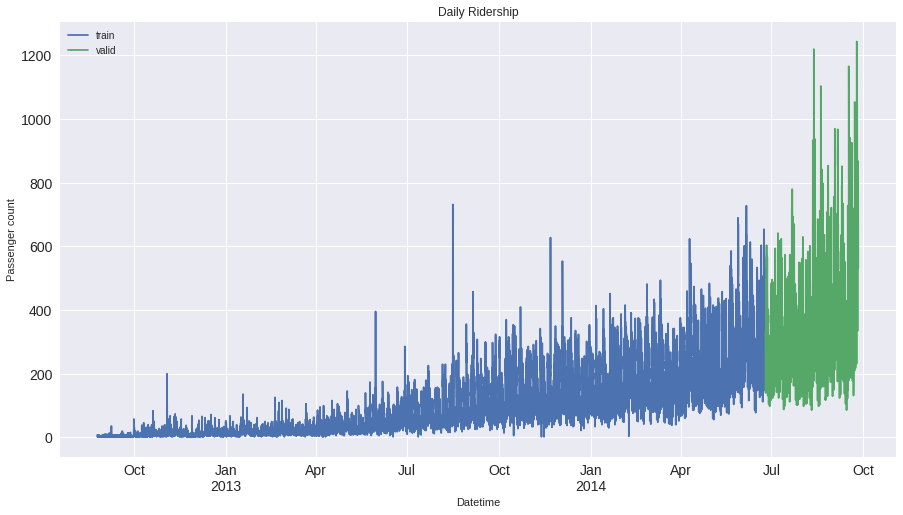

In [55]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train') 
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid') 
plt.xlabel("Datetime")
plt.ylabel("Passenger count")
plt.legend(loc='best')

Now We will predict the traffic for the validation part and then visualize how accurate our predictions are.

We will look at various models now to forecast the time series . Methods which we will be discussing for the forecasting are:

i) Naive Approach
ii) Moving Average
iii) Simple Exponential Smoothing
iv) Holt’s Linear Trend Model.

We will discuss each of these methods in detail now.

#i) Naive Approach

*In this forecasting technique, we assume that the next expected point is equal to the last observed point. So we can expect a straight horizontal line as the prediction. Lets understand it with an example and an image:*

Suppose we have passenger count for 5 days as shown below:

---
    Day    Passengers_count
    1             10
    2             12
    3             14
    4             13    
    5             15
And we have to predict the passenger count for next 2 days. Naive approach will assign the 5th day’s passenger count to the 6th and 7th day, i.e., 15 will be assigned to the 6th and 7th day.

---
    Day    Passengers_count
    1             10
    2             12
    3             14
    4             13    
    5             15
    6             15
    7             15

Now lets understand it with another example:


![alt text](https://s3.amazonaws.com/thinkific/file_uploads/118220/images/cae/fd5/157/1549364621006.jpg)


The blue line is the prediction here. All the predictions are equal to the last observed point.

Let’s make predictions using naive approach for the validation set.

In [56]:
dd= np.asarray(Train.Count)   # take all traffic value (No. of passengers ) in the form of arrray
print(len(dd))
print(dd.shape)
print(dd)
print(dd[len(dd)-1])

16056
(16056,)
[  8   2   6 ... 406 352 390]
390


In [57]:
valid.head(2)

,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,
2014-06-25 00:00:00,2014-06-25 00:00:00,332,2014,6,25,0,2,0
2014-06-25 01:00:00,2014-06-25 01:00:00,260,2014,6,25,1,2,0


In [58]:
y_hat = valid.copy()   # copy the complete validation dataset to y_hat 
y_hat['naive'] = dd[len(dd)-1] #take last observation from the training set and make a new column for prediction and put the same value forall predictions
y_hat.head()

,Datetime,Count,year,month,day,Hour,day of week,weekend,naive
Datetime,,,,,,,,,
2014-06-25 00:00:00,2014-06-25 00:00:00,332,2014,6,25,0,2,0,390
2014-06-25 01:00:00,2014-06-25 01:00:00,260,2014,6,25,1,2,0,390
2014-06-25 02:00:00,2014-06-25 02:00:00,218,2014,6,25,2,2,0,390
2014-06-25 03:00:00,2014-06-25 03:00:00,244,2014,6,25,3,2,0,390
2014-06-25 04:00:00,2014-06-25 04:00:00,168,2014,6,25,4,2,0,390


Text(0.5, 1.0, 'Naive Forecast')

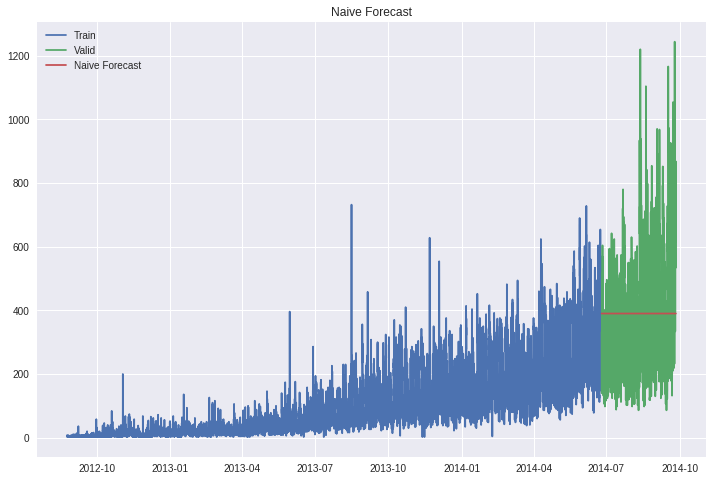

In [59]:
plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Count'], label='Train') 
plt.plot(valid.index,valid['Count'], label='Valid') 
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 

Here red horizontal line shows the predicted value in next months BY using Naive bias approach

1.   We can calculate how accurate our predictions are using rmse(Root Mean Square Error).
2.   rmse is the standard deviation of the residuals.
3.   Residuals are a measure of how far from the regression line data points are.

We will now calculate RMSE to check the accuracy of our model on validation data set.

In [60]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rmse = sqrt(mean_squared_error(valid.Count, y_hat.naive))  # check the difference between both of the values.
print(rmse) #root mean squared  error

186.37368520699056


We are getting 186.374 error in the Naive bias approach 

We can infer that this method is not suitable for datasets with high variability. We can reduce the rmse value by adopting different techniques.

#ii) Moving Average

In this technique we will take the average of the passenger counts for last few time periods only.

Let’s take an example to understand it:


![alt text](https://s3.amazonaws.com/thinkific/file_uploads/118220/images/1f6/be6/381/1549364621459.jpg)

Here the predictions are made on the basis of the average of last few points instead of taking all the previously known values.


Lets try the rolling mean for last 10, 20, 50 days and visualize the results.Lets try the rolling mean for last 10, 20, 50 days and visualize the results.

***# For 10 days**

```
Take the average of last 10 days(observation) from the training datasset

Data should be of passenger_Count 
```

In [64]:
y_hat_avg = valid.copy()   # nake  a copy of the valdation dataset 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1] # average of last 10 observations( of th e'Count' from the train dataset). in  the last column 
y_hat_avg.head()

,Datetime,Count,year,month,day,Hour,day of week,weekend,moving_avg_forecast
Datetime,,,,,,,,,
2014-06-25 00:00:00,2014-06-25 00:00:00,332,2014,6,25,0,2,0,439.2
2014-06-25 01:00:00,2014-06-25 01:00:00,260,2014,6,25,1,2,0,439.2
2014-06-25 02:00:00,2014-06-25 02:00:00,218,2014,6,25,2,2,0,439.2
2014-06-25 03:00:00,2014-06-25 03:00:00,244,2014,6,25,3,2,0,439.2
2014-06-25 04:00:00,2014-06-25 04:00:00,168,2014,6,25,4,2,0,439.2


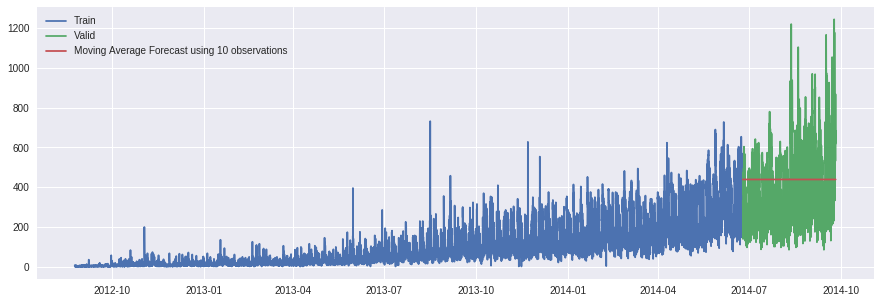

In [65]:
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best')

In [66]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast)) 
print(rms)

192.93805680435588


**# For 20 days**

```
Take the average of last 20 days(observation) from the training datasset

Data should be of passenger_Count 
And then assign the same value in the further coming dataset in the prediction column
```



In [67]:
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1] # average of last 20 observations. 
y_hat_avg.head()

,Datetime,Count,year,month,day,Hour,day of week,weekend,moving_avg_forecast
Datetime,,,,,,,,,
2014-06-25 00:00:00,2014-06-25 00:00:00,332,2014,6,25,0,2,0,378.6
2014-06-25 01:00:00,2014-06-25 01:00:00,260,2014,6,25,1,2,0,378.6
2014-06-25 02:00:00,2014-06-25 02:00:00,218,2014,6,25,2,2,0,378.6
2014-06-25 03:00:00,2014-06-25 03:00:00,244,2014,6,25,3,2,0,378.6
2014-06-25 04:00:00,2014-06-25 04:00:00,168,2014,6,25,4,2,0,378.6


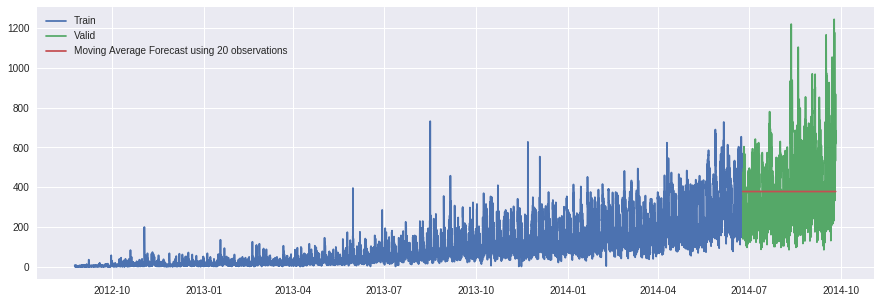

In [68]:
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations') 
plt.legend(loc='best')

In [69]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast)) 
print(rms)

186.67900919256638


**# For 50 days**

```
Take the average of last 50 days(observation) from the training datasset

Data should be of passenger_Count 
And then assign the same value in the further coming dataset in the prediction column
```


In [70]:
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1] # average of last 50 observations. 
y_hat_avg.head()

,Datetime,Count,year,month,day,Hour,day of week,weekend,moving_avg_forecast
Datetime,,,,,,,,,
2014-06-25 00:00:00,2014-06-25 00:00:00,332,2014,6,25,0,2,0,398.04
2014-06-25 01:00:00,2014-06-25 01:00:00,260,2014,6,25,1,2,0,398.04
2014-06-25 02:00:00,2014-06-25 02:00:00,218,2014,6,25,2,2,0,398.04
2014-06-25 03:00:00,2014-06-25 03:00:00,244,2014,6,25,3,2,0,398.04
2014-06-25 04:00:00,2014-06-25 04:00:00,168,2014,6,25,4,2,0,398.04


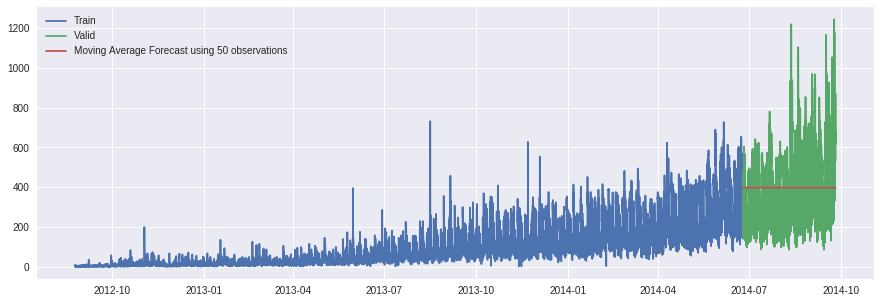

In [71]:
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()

In [72]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast)) 
print(rms)

186.5773761711873


We took the average of last 10, 20 and 50 observations and predicted based on that. This value can be changed in the above code in .rolling().mean() part. We can see that the predictions are getting weaker as we increase the number of observations.


You can see below :
When we are taking last 100 observations , then we  are getting the rmse value around 200 , which is greater than previous one ,This is not good for model

200.0119746415199


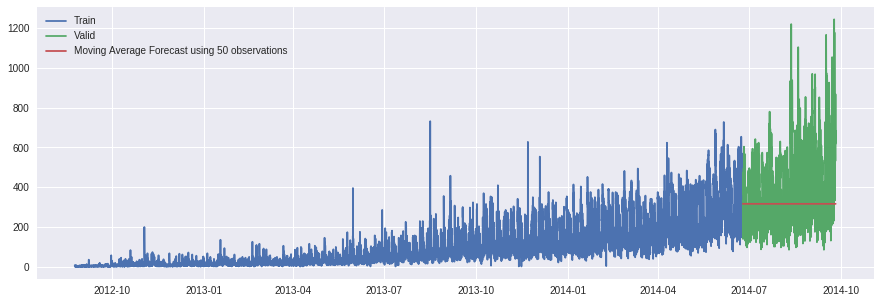

In [101]:
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(100).mean().iloc[-1] # average of last 50 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast)) 
print(rms)

#iii) Simple Exponential Smoothing

1.    In this technique, we assign** larger weights** to more recent observations(last observations) than to observations from the distant past.

2 .  The weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations.

Now we can say,
Starting observations (older observations) have smaller values of weights .


NOTE - If we give the entire weight to the last observed value only, this method will be similar to the naive approach. So, we can say that naive approach is also a simple exponential smoothing technique where the entire weight is given to the last observed value.

Let’s look at an example of simple exponential smoothing:

![alt text](https://s3.amazonaws.com/thinkific/file_uploads/118220/images/77b/752/347/1549364622440.jpg)



Here the predictions are made by assigning larger weight to the recent values and lesser weight to the old values.

In [61]:
import statsmodels.tsa.api
print(dir(statsmodels.tsa.api))

['AR', 'ARIMA', 'ARMA', 'ArmaProcess', 'DynamicFactor', 'DynamicVAR', 'ExponentialSmoothing', 'Holt', 'MarkovAutoregression', 'MarkovRegression', 'SARIMAX', 'SVAR', 'SimpleExpSmoothing', 'UnobservedComponents', 'VAR', 'VARMAX', 'VECM', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'acf', 'acovf', 'add_lag', 'add_trend', 'adfuller', 'arma_generate_sample', 'arma_order_select_ic', 'bds', 'ccf', 'ccovf', 'coint', 'datetools', 'detrend', 'filters', 'graphics', 'interp', 'kpss', 'lagmat', 'lagmat2ds', 'pacf', 'pacf_ols', 'pacf_yw', 'periodogram', 'q_stat', 'seasonal_decompose', 'statespace', 'stattools', 'tsatools', 'var', 'x13_arima_analysis', 'x13_arima_select_order']


In [116]:
!pip install statsmodels==0.9.0   # install the library/ package in google colab
print (statsmodels.__version__)

    100% |████████████████████████████████| 7.4MB 6.4MB/s 
  Found existing installation: statsmodels 0.8.0
    Uninstalling statsmodels-0.8.0:
      Successfully uninstalled statsmodels-0.8.0


0.8.0


In [0]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = valid.copy() 

In [75]:
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(valid)) 
y_hat_avg.head()

,Datetime,Count,year,month,day,Hour,day of week,weekend,moving_avg_forecast,SES
Datetime,,,,,,,,,,
2014-06-25 00:00:00,2014-06-25 00:00:00,332,2014,6,25,0,2,0,398.04,385.577197
2014-06-25 01:00:00,2014-06-25 01:00:00,260,2014,6,25,1,2,0,398.04,385.577197
2014-06-25 02:00:00,2014-06-25 02:00:00,218,2014,6,25,2,2,0,398.04,385.577197
2014-06-25 03:00:00,2014-06-25 03:00:00,244,2014,6,25,3,2,0,398.04,385.577197
2014-06-25 04:00:00,2014-06-25 04:00:00,168,2014,6,25,4,2,0,398.04,385.577197


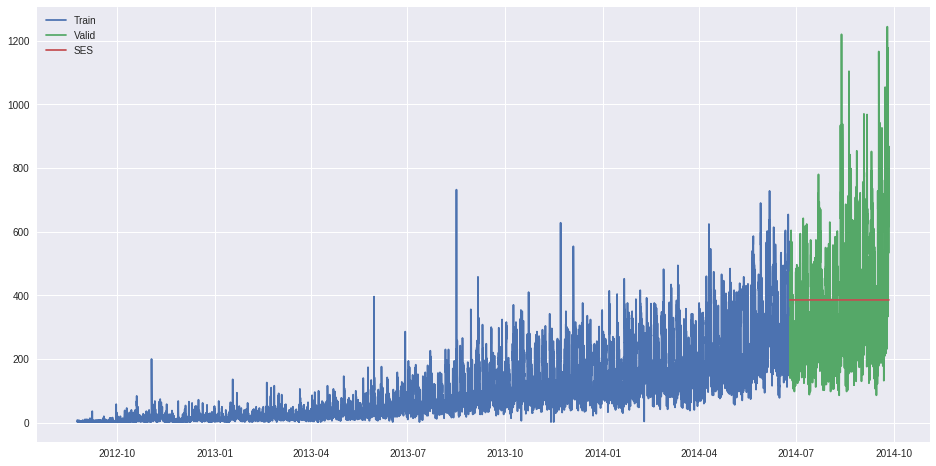

In [76]:
plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['SES'], label='SES') 
plt.legend(loc='best') 

In [77]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SES)) 
print(rms)

186.40944652452376


We can infer that the fit of the model has improved as the rmse value has reduced.

#iv) Holt’s Linear Trend Model